In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

Ejercicio 1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza indica si las variables varían en la misma dirección o no y la correlación la fuerza de la correlación entre las variables. 

Ejercicio 2. Calcula covarianza y correlación de Pearson. Interpretación.

In [3]:
df = pd.read_csv("listings_pair_1.csv", index_col = 0)

In [4]:
df.head(2)

neighbourhood_group     room_type  price  minimum_nights  number_of_reviews  \
0           Chamartín  Private room     59               1                 81   
1              Latina  Private room     31               4                 33   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.57                               1               149   
1               0.38                               2               131   

   number_of_reviews_ltm  
0                      3  
1                      0

In [6]:
cov = df.cov()
cov

price  minimum_nights  \
price                           16958.117951      -94.182150   
minimum_nights                    -94.182150     1323.212281   
number_of_reviews                -822.580623      -98.851004   
reviews_per_month                  -7.021499       -2.655761   
calculated_host_listings_count    147.754858      -19.819585   
availability_365                 2659.545009      167.355122   
number_of_reviews_ltm            -127.324190      -33.046660   

                                number_of_reviews  reviews_per_month  \
price                                 -822.580623          -7.021499   
minimum_nights                         -98.851004          -2.655761   
number_of_reviews                     4758.206518          56.264518   
reviews_per_month                       56.264518           1.915057   
calculated_host_listings_count         -48.482923           1.237224   
availability_365                       487.052217          23.265470   
number_of_reviews_ltm                  515.382252          12.789869   

                                calculated_host_listings_count  \
price                                               147.754858   
minimum_nights                                      -19.819585   
number_of_reviews                                   -48.482923   
reviews_per_month                                     1.237224   
calculated_host_listings_count                      775.224071   
availability_365                                    269.044690   
number_of_reviews_ltm                                21.035612   

                                availability_365  number_of_reviews_ltm  
price                                2659.545009            -127.324190  
minimum_nights                        167.355122             -33.046660  
number_of_reviews                     487.052217             515.382252  
reviews_per_month                      23.265470              12.789869  
calculated_host_listings_count        269.044690              21.035612  
availability_365                    19507.300405             253.847955  
number_of_reviews_ltm                 253.847955             178.683118

<font color ='skyblue'> Observamos que tenemos variables con covarianza positiva y negativa. En el caso `price` y `availability_365` vemos una covarianza positiva, lo que indica que ambas variables varían en la misma dirección. En el caso `price` y `minimum_nights` tienen covarianza negativa, lo que indica que mientras una disminuye la otra aumenta.
En la situación de las cols `calculated_host_listings_count` y ` reviews_per_month ` tenemos una covarianza muy cercana a 0, 1.23. En este caso el valor nos indica que no podemos afirmar en qué sentido varían una y otra variable.

In [9]:
cor_pearson = df.corr(method = 'pearson')
cor_pearson

price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.019882          -0.091573   
minimum_nights                 -0.019882        1.000000          -0.039395   
number_of_reviews              -0.091573       -0.039395           1.000000   
reviews_per_month              -0.038963       -0.052757           0.589416   
calculated_host_listings_count  0.040751       -0.019569          -0.025244   
availability_365                0.146224        0.032940           0.050554   
number_of_reviews_ltm          -0.073144       -0.067963           0.558941   

                                reviews_per_month  \
price                                   -0.038963   
minimum_nights                          -0.052757   
number_of_reviews                        0.589416   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.032110   
availability_365                         0.120371   
number_of_reviews_ltm                    0.691407   

                                calculated_host_listings_count  \
price                                                 0.040751   
minimum_nights                                       -0.019569   
number_of_reviews                                    -0.025244   
reviews_per_month                                     0.032110   
calculated_host_listings_count                        1.000000   
availability_365                                      0.069185   
number_of_reviews_ltm                                 0.056520   

                                availability_365  number_of_reviews_ltm  
price                                   0.146224              -0.073144  
minimum_nights                          0.032940              -0.067963  
number_of_reviews                       0.050554               0.558941  
reviews_per_month                       0.120371               0.691407  
calculated_host_listings_count          0.069185               0.056520  
availability_365                        1.000000               0.135967  
number_of_reviews_ltm                   0.135967               1.000000

<font color ='skyblue'> Según la tabla de arriba, podemos afirmar que las columnas `calculated_host_listings_count` y `price` tiene una correlación muy cercana a 0 entonces la correlación que tienen es muy débil. La correlación en el caso de  `reviews_per_month` y	`number_of_reviews_ltm` es muy alta, de 0.69, lo que indica que mientras una aumenta la otra aumenta también. 
En nuestro dataset no hemos encontrado correlaciones negativas fuertes, que indicarían que mientras una variable disminuye la otra disminuye también.
Conclusión: en el mercado inmobiliario NUNCA baja nada, no está hecho para todos los bolsillos 🥵​


Ejercicio 3. Crea un heatmap

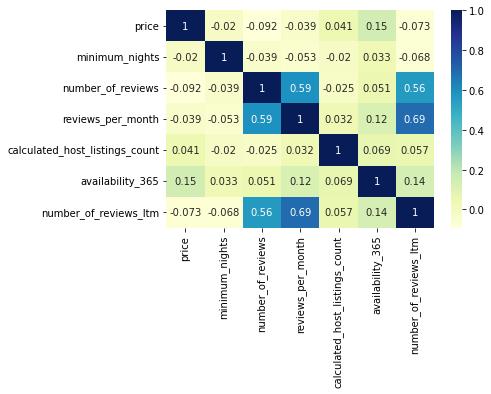

In [10]:
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True);


In [17]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool));
mask

/tmp/ipykernel_863/1839409988.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool));


array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

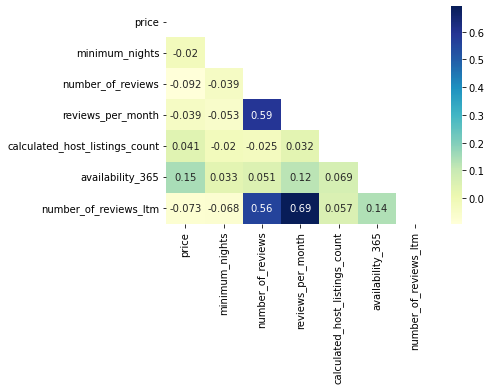

In [15]:
sns.heatmap(df.corr(), cmap = "YlGnBu", mask = mask, annot = True);

<font color ='skyblue'> Aplicamos una máscara para eliminar los valores simétricos y que no sea redundante.

Ejercicio 4. Guarda la gráfica.

In [12]:
plt.savefig("Correlaciones Pearson.jpg", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>